## Load $\delta$a$\delta$i

I have not installed dadi globally on huluvu. Instead, I left it in my Downloads directory '/home/claudius/Downloads/dadi'. In order for Python to find that module, I need to add that directory to the PYTHONPATH variable.

In [2]:
import sys

sys.path

['',
 '/usr/local/anaconda2/lib/python27.zip',
 '/usr/local/anaconda2/lib/python2.7',
 '/usr/local/anaconda2/lib/python2.7/plat-linux2',
 '/usr/local/anaconda2/lib/python2.7/lib-tk',
 '/usr/local/anaconda2/lib/python2.7/lib-old',
 '/usr/local/anaconda2/lib/python2.7/lib-dynload',
 '/usr/local/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages',
 '/usr/local/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/claudius/.ipython']

In [3]:
sys.path.insert(0, '/home/claudius/Downloads/dadi')

In [4]:
sys.path

['/home/claudius/Downloads/dadi',
 '',
 '/usr/local/anaconda2/lib/python27.zip',
 '/usr/local/anaconda2/lib/python2.7',
 '/usr/local/anaconda2/lib/python2.7/plat-linux2',
 '/usr/local/anaconda2/lib/python2.7/lib-tk',
 '/usr/local/anaconda2/lib/python2.7/lib-old',
 '/usr/local/anaconda2/lib/python2.7/lib-dynload',
 '/usr/local/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages',
 '/usr/local/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/claudius/.ipython']

In [5]:
import dadi

In [6]:
import pylab

pylab.rcParams['figure.figsize'] = [12.0, 10.0]

%matplotlib inline

## Load data

In [7]:
% ll dadiExercises/

total 33676
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius      499 Mar 24 14:04 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      499 Mar 24 14:02 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius       37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius    13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius    13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius     4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius   155251 Mar 22 12:37 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius   619518 Mar 21 11:09 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius     1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius      486 Mar 24 20:08 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      450 Mar

In [8]:
% cat dadiExercises/ERY.FOLDED.sfs.dadi_format

# this is the ML estimate of the folded sample frequency spectrum for erythropus, estimated with realSFS of ANGSD
# this is the spectrum in dadi format (see section 3.1 of the manual)
37 folded
1594818.222085 7833.038690 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799 1072.516527 1417.916128 395.750470 1947.087637 367.072082 966.622924 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  


I have turned the 1D folded SFS's from `realSFS` into $\delta$d$\delta$i format by hand according to the description in section 3.1 of the manual.

Note, that the last line, indicating the mask, has length 37, but the folded spectrum has length 19. Dadi wants to mask counts from invariable sites. For an unfolded spectrum, i. e. polarised with respect to an inferred ancestral allele at each site, the first and the last count classes would correspond to invariable sites. In a folded spectrum, i. e. with counts of the minor allele at each site, the last count class corresponds to SNP's with minor sample allele frequency of $n/2$ (with even sample size).

In [9]:
fs_ery = dadi.Spectrum.from_file('dadiExercises/ERY.FOLDED.sfs.dadi_format')

In [10]:
%pdoc dadi.Spectrum.from_file

In [11]:
fs_ery

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [12]:
ns = fs_ery.sample_sizes
ns

array([36])

In [13]:
fs_ery.pop_ids = ['ery'] # must be an array, otherwise leads to error later on

In [14]:
# the number of segregating sites in the spectrum

fs_ery.sum()

43649.777914000006

According to the number of segregating sites, this spectrum should have good power to distinguish between alternative demographic models (see Adams2004). However, the noise in the data is extreme, as can be seen below, which might compromise this power and maybe even lead to false inferences.

## Plot the data

In [15]:
%pdoc dadi.Plotting.plot_1d_fs

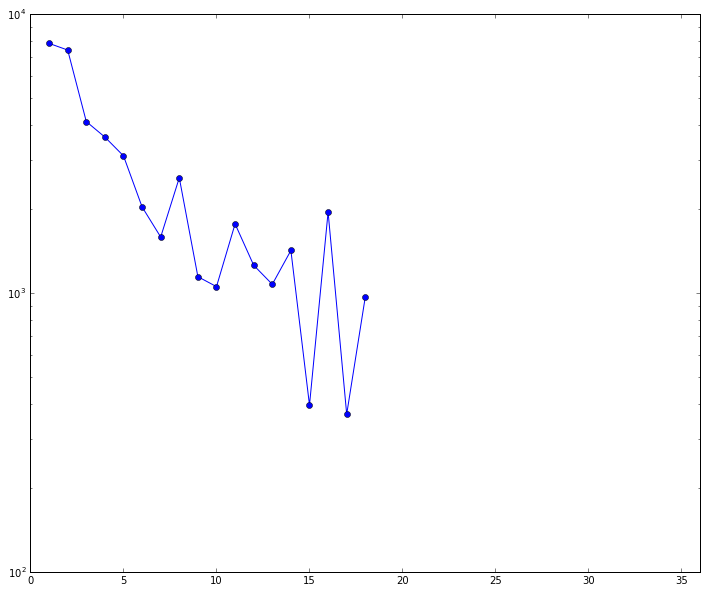

In [16]:
pylab.rcParams['figure.figsize'] = [12.0, 10.0]

dadi.Plotting.plot_1d_fs(fs_ery, show=False)

## Built-in 1D models

In [17]:
# show modules within dadi

dir(dadi)

['Demographics1D',
 'Demographics2D',
 'Godambe',
 'Inference',
 'Integration',
 'Misc',
 'Numerics',
 'PhiManip',
 'Plotting',
 'Spectrum',
 'Spectrum_mod',
 'Triallele',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'integration_c',
 'logging',
 'numpy',
 'tridiag']

In [18]:
dir(dadi.Demographics1D)

['Integration',
 'Numerics',
 'PhiManip',
 'Spectrum',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'bottlegrowth',
 'growth',
 'numpy',
 'snm',
 'three_epoch',
 'two_epoch']

In [19]:
# show the source of the 'Demographics1D' method

%psource dadi.Demographics1D

### standard neutral model

In [20]:
# create link to method

func = dadi.Demographics1D.snm

In [21]:
# make the extrapolating version of the demographic model function

func_ex = dadi.Numerics.make_extrap_log_func(func)

In [22]:
# setting the smallest grid size slightly larger than the largest population sample size

pts_l = [40, 50, 60]

The `snm` function does not take parameters to optimize. I can therefore get directly the expected model. The `snm` function does not take a `fold` argument. I am therefore going to calculated an unfolded expected spectrum and then fold.

In [23]:
# calculate unfolded AFS under standard neutral model (up to a scaling factor theta)

model = func_ex(0, ns, pts_l)
model

Spectrum([-- 0.9956799394019464 0.4981564278703058 0.3321898574986928
 0.24919667744224816 0.19939790258679638 0.1661970878062821
 0.14248104377018878 0.1246930658790548 0.11085717946547267
 0.09978779124736985 0.09073040723382213 0.08318202250611753
 0.07679443263533685 0.0713189249265068 0.06657306836113545
 0.06242002970483825 0.0587552149564719 0.055497288680948074
 0.052582000282866075 0.04995792826310336 0.04758347287343962
 0.04542461915254542 0.0434532518907827 0.04164592443914579
 0.03998294873211848 0.03844767650121102 0.03702592302757683
 0.03570552430576448 0.03447599502439583 0.03332824999581658
 0.032254375802771754 0.031247447500913152 0.0303013796010043
 0.029410802565291765 0.02857096039285141 --], folded=False, pop_ids=None)

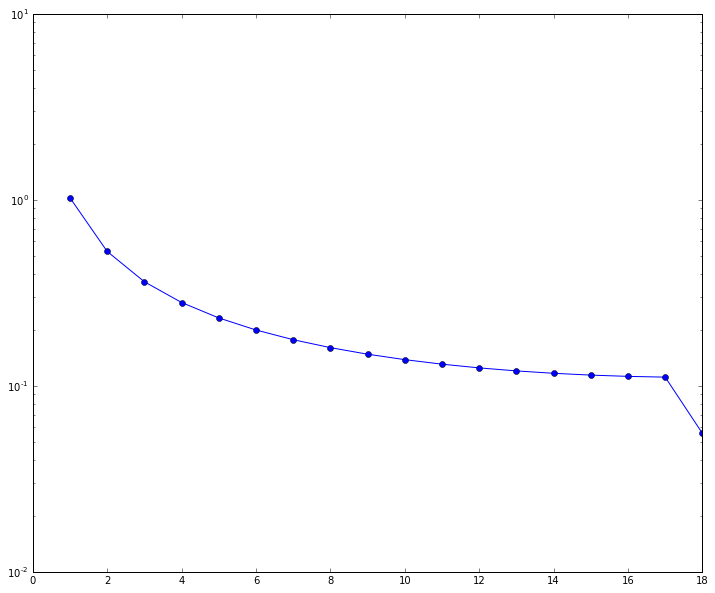

In [24]:
dadi.Plotting.plot_1d_fs(model.fold()[:19], show=False)

What's happening in the 18th count class?

In [25]:
# get the source of the fold method, which is part of the Spectrum object

%psource dadi.Spectrum.fold

In [26]:
# get the docstring of the Spectrum object

%pdoc dadi.Spectrum

In [27]:
# retrieve the spectrum array from the Spectrum object

model.data

array([ 2.71828183,  0.99567994,  0.49815643,  0.33218986,  0.24919668,
        0.1993979 ,  0.16619709,  0.14248104,  0.12469307,  0.11085718,
        0.09978779,  0.09073041,  0.08318202,  0.07679443,  0.07131892,
        0.06657307,  0.06242003,  0.05875521,  0.05549729,  0.052582  ,
        0.04995793,  0.04758347,  0.04542462,  0.04345325,  0.04164592,
        0.03998295,  0.03844768,  0.03702592,  0.03570552,  0.034476  ,
        0.03332825,  0.03225438,  0.03124745,  0.03030138,  0.0294108 ,
        0.02857096,  2.71828183])

I am going to fold manually now.

In [28]:
# reverse spectrum and add to itself

model_fold = model.data + model.data[::-1]
model_fold

array([ 5.43656366,  1.0242509 ,  0.52756723,  0.36249124,  0.28044412,
        0.23165228,  0.19952534,  0.17695704,  0.16039859,  0.1478831 ,
        0.13823547,  0.13071336,  0.12482795,  0.12024768,  0.11674354,
        0.11415654,  0.11237796,  0.11133722,  0.11099458,  0.11133722,
        0.11237796,  0.11415654,  0.11674354,  0.12024768,  0.12482795,
        0.13071336,  0.13823547,  0.1478831 ,  0.16039859,  0.17695704,
        0.19952534,  0.23165228,  0.28044412,  0.36249124,  0.52756723,
        1.0242509 ,  5.43656366])

In [29]:
# discard all count classes >n/2

model_fold = model_fold[:19]
model_fold

array([ 5.43656366,  1.0242509 ,  0.52756723,  0.36249124,  0.28044412,
        0.23165228,  0.19952534,  0.17695704,  0.16039859,  0.1478831 ,
        0.13823547,  0.13071336,  0.12482795,  0.12024768,  0.11674354,
        0.11415654,  0.11237796,  0.11133722,  0.11099458])

When the sample size is even, then highest sample frequency class corresponds to just one unfolded class (18). This has been added to itself and those SNP's are counted twice at the moment. I need to divide this class by 2 to get the correct count for this folded class.

In [30]:
# divide highest sample frequency class by 2

model_fold[18] = model_fold[18]/2.0

In [31]:
model_fold

array([ 5.43656366,  1.0242509 ,  0.52756723,  0.36249124,  0.28044412,
        0.23165228,  0.19952534,  0.17695704,  0.16039859,  0.1478831 ,
        0.13823547,  0.13071336,  0.12482795,  0.12024768,  0.11674354,
        0.11415654,  0.11237796,  0.11133722,  0.05549729])

In [32]:
# create dadi Spectrum object from array, need to specify custom mask

model_folded = dadi.Spectrum(data=model_fold, mask_corners=False, mask= [1] + [0]*18)
model_folded

Spectrum([-- 1.0242508997947979 0.5275672304355975 0.3624912370996971
 0.2804441249431613 0.23165227838956814 0.19952533780209866
 0.1769570387945846 0.16039859018481928 0.1478831024930495
 0.13823546774858086 0.1307133559659406 0.12482794694526332
 0.12024768452611956 0.11674354407905221 0.11415654123457508
 0.11237795796794162 0.11133721523933798 0.055497288680948074], folded=False, pop_ids=None)

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


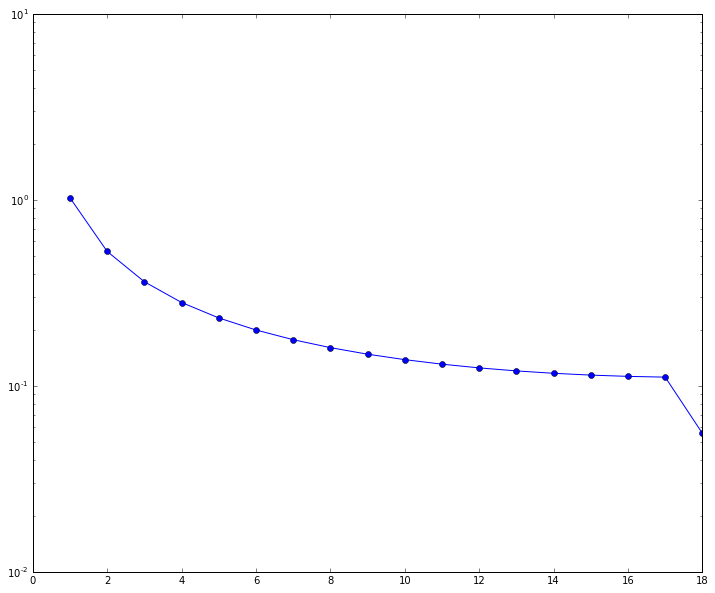

In [33]:
dadi.Plotting.plot_1d_fs(model_folded)

The folded expected spectrum is correct. Also, see figure 4.5 in Wakeley2009.

#### How to fold an unfolded spectrum

In [34]:
# fold the unfolded model

model_folded = model.fold()
#model_folded = model_folded[:(ns[0]+1)]
model_folded.pop_ids = ['ery'] # be sure to give an array, not a scalar string
model_folded

Spectrum([-- 1.0242508997947979 0.5275672304355975 0.3624912370996971
 0.2804441249431613 0.23165227838956814 0.19952533780209866
 0.1769570387945846 0.16039859018481928 0.1478831024930495
 0.13823546774858086 0.1307133559659406 0.12482794694526332
 0.12024768452611956 0.11674354407905221 0.11415654123457508
 0.11237795796794162 0.11133721523933798 0.055497288680948074 -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

In [35]:
ll_model_folded = dadi.Inference.ll_multinom(model_folded, fs_ery)

In [36]:
print 'The log composite likelihood of the observed ery spectrum given a standard neutral model is {0:.3f}.'.format(ll_model_folded)

The log composite likelihood of the observed ery spectrum given a standard neutral model is -2460.087.


### $\theta$ and implied $N_{ref}$

In [37]:
theta = dadi.Inference.optimal_sfs_scaling(model_folded, fs_ery)

In [38]:
print 'The optimal value of theta is {0:.3f}.'.format(theta)

The optimal value of theta is 10555.390.


This theta estimate is a little bit higher than what I estimated with curve fitting in `Fist_Steps_with_dadi.ipynb`, which was 10198.849.

What effective ancestral population size would that imply?

According to section 4.4 in the dadi manual:

$$
\theta = 4 N_{ref} \mu_{L} \qquad \text{L: sequence length}
$$

Let's assume the mutation rate per nucleotide site per generation is $3\times 10^{-9}$ (see e. g. Liu2017). Then

$$
\mu_{L} = \mu_{site} \times L
$$

So

$$
\theta = 4 N_{ref} \mu_{site} \times L
$$

and

$$
N_{ref} = \frac{\theta}{4 \mu_{site} L}
$$

In [39]:
mu = 3e-9
L = fs_ery.data.sum() # this sums over all entries in the spectrum, including masked ones, i. e. also contains invariable sites
print "The total sequence length is " + str(L)
N_ref = theta/L/mu/4
print "The effective ancestral population size (in number of diploid individuals) implied by this theta is: {0}.".format(int(N_ref))

The total sequence length is 1638468.0
The effective ancestral population size (in number of diploid individuals) implied by this theta is: 536852.


This effective population size is consistent with those reported in Lynch2016 for other insect species.

---

Begin Digression:

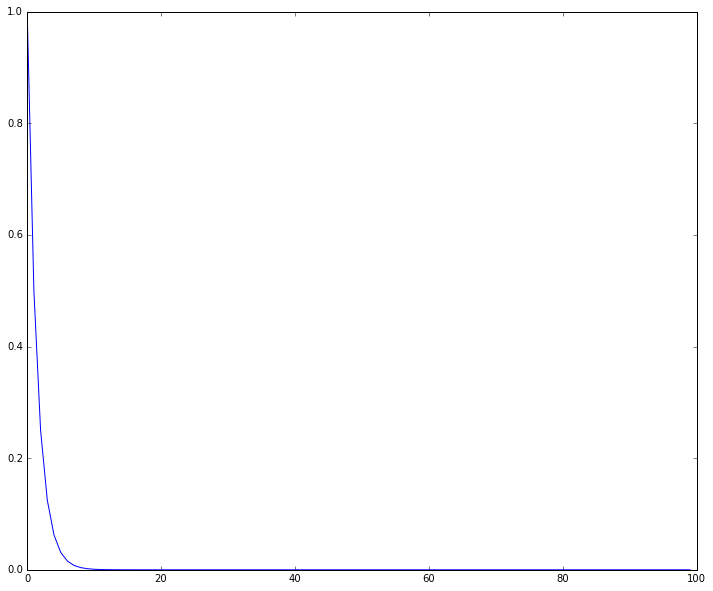

In [71]:
x = pylab.arange(0, 100)
y = 0.5**(x)
pylab.plot(x, y)

In [73]:
x[:10] * y[:10]

array([ 0.        ,  0.5       ,  0.5       ,  0.375     ,  0.25      ,
        0.15625   ,  0.09375   ,  0.0546875 ,  0.03125   ,  0.01757812])

In [72]:
sum(x * y)

1.9999999999999998

End Digression

---

In [37]:
model_folded * theta

Spectrum([-- 10811.368057785941 5568.678050083938 3826.2365039582855
 2960.1972085273856 2445.180222537339 2106.06782406999 1867.850618639873
 1693.0697300685547 1560.9638721332371 1459.129321506598 1379.730495427729
 1317.6077058788953 1269.2612481657227 1232.2736779258435 1204.966853080696
 1186.193212441624 1175.20776669327 585.7955450750727 -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

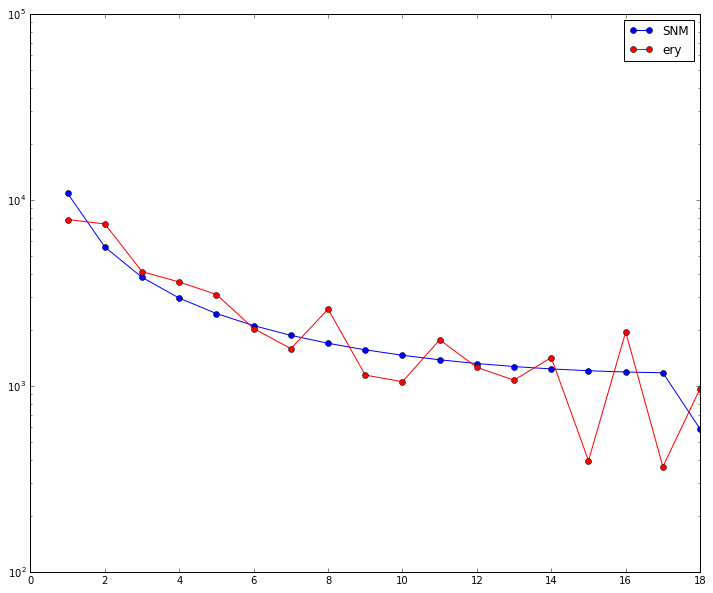

In [40]:
pylab.semilogy(model_folded * theta, "bo-", label='SNM')
pylab.plot(fs_ery, "ro-", label='ery')
pylab.legend()

In [41]:
%psource dadi.Plotting.plot_1d_comp_Poisson

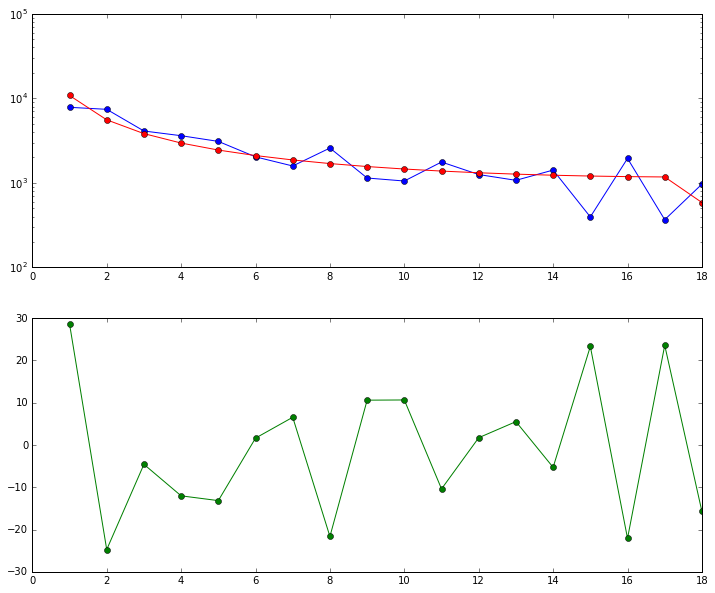

In [42]:
# compare model prediction and data visually with dadi function

dadi.Plotting.plot_1d_comp_multinom(model_folded[:19], fs_ery[:19], residual='linear')

The lower plot is for the scaled Poisson residuals. 

$$
residuals = (model - data)/\sqrt{model}
$$

The model is the expected counts in each frequency class. If these counts are Poisson distributed, then their variance is equal to their expectation. The differences between model and data are therefore scaled by the expected standard deviation of the model counts.

**The observed counts deviate by up to 30 standard deviations from the model!**

What could be done about this? 

The greatest deviations are seen for the first two frequency classes, the ones that should provide the greatest amount of information (Fu1994) for theta and therefore probably also other parameters. Toni has suggested that the doubleton class is inflated due to "miscalling" heterozygotes as homozygotes. When they contain a singleton they will be "called" as homozygote and therefore contribute to the doubleton count. This is aggravated by the fact that the sequenced individuals are all male which only possess one X chromosome. The X chromosome is the fourth largest of the 9 chromosomes of these grasshoppers (8 autosomes + X) (see Gosalvez1988, fig. 2). That is, about 1/9th of the sequenced RAD loci are haploid but ANGSD assumes all loci to be diploid. The genotype likelihoods it calculates are all referring to diploid genotypes.

I think one potential reason for the extreme deviations is that the genotype likelihoods are generally biased toward homozygote genotypes (i. e. also for autosomal loci) due to PCR duplicates (see eq. 1 in Nielsen2012). So, one potential improvement would be to remove PCR duplicates. 

Another potential improvement could be found by subsampling 8/9th to 8/10th of the contigs in the SAF files and estimating an SFS from these. Given enough subsamples, one should eventually be found that maximally excludes loci from the X chromosome. This subsample is expected to produce the least squared deviations from an expected SFS under the standard neutral model. However, one could argue that this attempt to exclude problematic loci could also inadvertently remove loci that strongly deviate from neutral expectations due to non-neutral evolution, again reducing power to detect deviations from the standard neutral model. I think one could also just apply the selection criterion of the second MAF class to be lower than the first and just save all contig subsamples and SFS's that fulfill that criterioin, since that should be true for all demographic scenarios.

### Exponential growth

#### Creating a folded spectrum exactly how dadi expects it

As seen above in the folded model spectrum, dadi just masks out entries that are not sensical in a folded spectrum, but keeps the length of the spectrum the same as the unfolded. That way the sample size (i. e. number of chromosomes) is determined correctly. Let's create a correct folded spectrum object for ery.

In [43]:
fs_ery

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

In [44]:
# make copy of spectrum array
data_abc = fs_ery.data.copy()

In [45]:
# resize the array to the unfolded length

data_abc.resize((37,))
data_abc

array([  1.59481822e+006,   7.83303869e+003,   7.41469984e+003,
         4.10927941e+003,   3.61471726e+003,   3.09597332e+003,
         2.03146089e+003,   1.58465693e+003,   2.58365232e+003,
         1.14207525e+003,   1.05234602e+003,   1.76577342e+003,
         1.25513880e+003,   1.07251653e+003,   1.41791613e+003,
         3.95750470e+002,   1.94708764e+003,   3.67072082e+002,
         9.66622924e+002,   6.92336709e-310,   3.16202013e-322,
         3.95252517e-322,   1.12141835e-316,   6.92335623e-310,
         6.92335623e-310,   6.92333624e-310,   6.92332237e-310,
         6.92335669e-310,   3.16202013e-322,   0.00000000e+000,
         1.26480805e-321,   5.53353523e-322,   1.44957042e-316,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000])

In [46]:
fs_ery_ext = dadi.Spectrum(data_abc)
fs_ery_ext

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924
 6.92336708817315e-310 3.16e-322 3.95e-322 1.12141835e-316
 6.9233562306889e-310 6.92335623072683e-310 6.92333624156993e-310
 6.92332237488873e-310 6.92335669336516e-310 3.16e-322 0.0 1.265e-321
 5.53e-322 1.4495704e-316 0.0 0.0 0.0 --], folded=False, pop_ids=None)

In [47]:
fs_ery_ext.fold()

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [48]:
fs_ery_ext = fs_ery_ext.fold()
fs_ery_ext.pop_ids = ['ery']
fs_ery_ext

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

In [49]:
fs_ery_ext.sample_sizes

array([36])

Now, the reported sample size is correct and we have a `Spectrum` object that dadi can handle correctly.

## To fold or not to fold by ANGSD

Does estimating an unfolded spectrum with ANGSD and then folding yield a sensible folded SFS when the sites are not polarised with respect to an ancestral allele but with respect to the reference allele? [Matteo Fumagalli thinks that this is sensible.](https://groups.google.com/d/msg/ngstools-user/9Z4viLJ7NJA/QZ7Owf5xBAAJ)

#### Load SFS folded by ANGSD

In [51]:
% cat dadiExercises/ERY.FOLDED.sfs.dadi_format

# this is the ML estimate of the folded sample frequency spectrum for erythropus, estimated with realSFS of ANGSD
# this is the spectrum in dadi format (see section 3.1 of the manual)
37 folded
1594818.222085 7833.038690 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799 1072.516527 1417.916128 395.750470 1947.087637 367.072082 966.622924 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  


In [52]:
# load the spectrum that was created from folded SAF's

fs_ery_folded_by_Angsd = dadi.Spectrum.from_file('dadiExercises/ERY.FOLDED.sfs.dadi_format')
fs_ery_folded_by_Angsd

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [53]:
# extract unmasked entries of the SFS

m = fs_ery_folded_by_Angsd.mask
fs_ery_folded_by_Angsd[m == False]

Spectrum([7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924], folded=True, pop_ids=None)

#### Load unfolded SFS

In [54]:
% ll ../ANGSD/SFS/ERY/

total 332
-rw-rw-r-- 1 claudius    229 Dec 22 18:19 ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius    229 Dec 22 20:28 ERY.FOLDED.sfs1
-rw-rw-r-- 1 claudius    229 Dec 21 21:07 ERY.FOLDED.sfs2
-rw-rw-r-- 1 claudius    228 Dec 21 21:08 ERY.FOLDED.sfs3
-rw-rw-r-- 1 claudius    228 Dec 21 21:20 ERY.FOLDED.sfs4
-rw-rw-r-- 1 claudius 227889 Dec 20 22:49 ERY.FOLDED.sfs.boot
-rw-rw-r-- 1 claudius  45397 Dec 23 22:07 ERY.FOLDED.sfs.boot.exh
-rw-rw-r-- 1 claudius  22870 Dec 22 16:26 ERY.FOLDED.sfs.ml
-rw-rw-r-- 1 claudius    421 Mar 24 12:54 ERY.unfolded.sfs


I have copied the unfolded SFS into the current directory.

In [55]:
% ll

total 572
-rw-rw-r-- 1 claudius 482515 Apr  3 20:32 1D_models.ipynb
drwxrwxr-x 4 claudius   4096 Mar 24 20:08 dadiExercises/
-rw-rw-r-- 1 claudius  36308 Mar 25 14:05 ery_fold_comp.png
-rw-rw-r-- 1 claudius   3560 Mar 25 08:40 EryPar.FOLDED.2dsfs
-rw-rw-r-- 1 claudius    433 Mar 24 20:15 ERY.unfolded.sfs
-rw-rw-r-- 1 claudius    421 Mar 24 20:14 ERY.unfolded.sfs~
-rw-rw-r-- 1 claudius  37242 Mar 25 14:07 par_fold_comp.png
-rw-rw-r-- 1 claudius    421 Mar 24 20:16 PAR.unfolded.sfs
-rw-rw-r-- 1 claudius    409 Mar 24 20:15 PAR.unfolded.sfs~


In [56]:
% cat ERY.unfolded.sfs

37 unfolded
1592046.636125 7148.627587 6831.828430 3473.268669 3417.591990 2249.932322 1980.824357 1011.763357 2262.489617 557.169754 1049.858226 1159.694611 768.373223 1125.393799 448.462048 544.635916 1014.348661 147.731786 975.251801 233.415985 851.137519 12.642136 803.134099 0.128476 567.179523 446.009983 158.967094 484.096759 372.705620 540.860079 95.276852 808.290844 234.084809 614.920896 625.008059 890.804592 2515.454396 


In [57]:
# load unfolded spectrum

fs_ery_unfolded_by_ANGSD = dadi.Spectrum.from_file('ERY.unfolded.sfs')
fs_ery_unfolded_by_ANGSD

Spectrum([-- 7148.627587 6831.82843 3473.268669 3417.59199 2249.932322 1980.824357
 1011.763357 2262.489617 557.169754 1049.858226 1159.694611 768.373223
 1125.393799 448.462048 544.635916 1014.348661 147.731786 975.251801
 233.415985 851.137519 12.642136 803.134099 0.128476 567.179523 446.009983
 158.967094 484.096759 372.70562 540.860079 95.276852 808.290844 234.084809
 614.920896 625.008059 890.804592 --], folded=False, pop_ids=None)

In [58]:
# fold unfolded spectrum

fs_ery_unfolded_by_Angsd_folded = fs_ery_unfolded_by_ANGSD.fold()
fs_ery_unfolded_by_Angsd_folded

Spectrum([-- 8039.432178999999 7456.836488999999 4088.189565 3651.676799 3058.223166
 2076.101209 1552.623436 2635.1952370000004 1041.266513 1208.8253200000001
 1605.7045939999998 1335.552746 1125.522275 1251.596147 557.278052
 1865.4861799999999 381.14777100000003 975.251801 -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

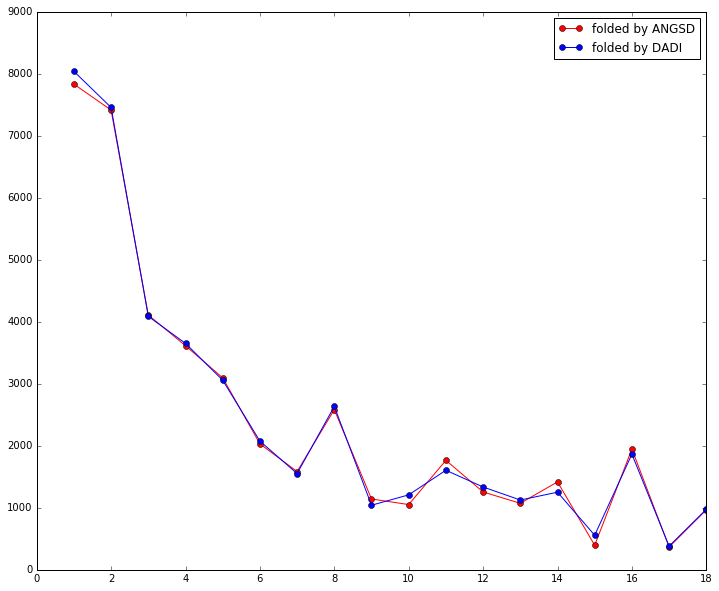

In [59]:
# plot the two spectra

pylab.rcParams['figure.figsize'] = [12.0, 10.0]

pylab.plot(fs_ery_folded_by_Angsd, 'ro-', label='folded by ANGSD')
pylab.plot(fs_ery_unfolded_by_Angsd_folded, 'bo-', label='folded by DADI')
pylab.legend()
pylab.savefig('ery_fold_comp.png')

In [59]:
%psource dadi.Plotting.plot_1d_comp_Poisson

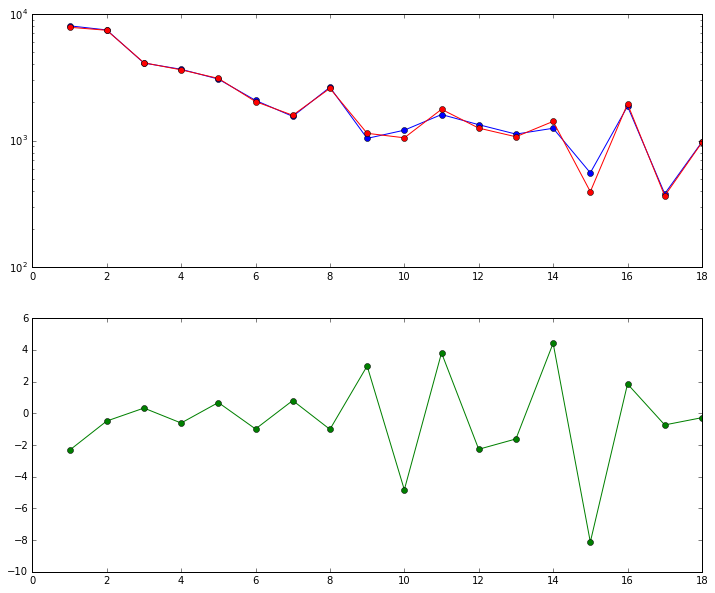

In [60]:
dadi.Plotting.plot_1d_comp_Poisson(fs_ery_folded_by_Angsd[:19], fs_ery_unfolded_by_Angsd_folded[:19], \
                                   residual='linear')

The sizes of the residuals (scaled by the Poisson standard deviations) indicate that the two versions of the folded SFS of ery are significantly different.

Now, what does the parallelus data say?

In [61]:
% ll dadiExercises/

total 33676
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius      499 Mar 24 14:04 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      499 Mar 24 14:02 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius       37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius    13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius    13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius     4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius   155251 Mar 22 12:37 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius   619518 Mar 21 11:09 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius     1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius      486 Mar 24 20:08 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      450 Mar

In [62]:
% cat dadiExercises/PAR.FOLDED.sfs.dadi_format

# this is the ML estimate of the folded sample frequency spectrum for parallelus, estimated with realSFS of ANGSD
# this is the spectrum in dadi format (see section 3.1 of the manual)
37 folded
1171183.294811 8409.256970 12008.479728 5476.826032 3090.791731 2755.941992 1804.378260 357.199759 2552.273719 832.442184 873.647652 0.001111 2420.101426 0.010094 910.498821 0.725863 1506.959669 232.289352 523.880826 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [63]:
# load the spectrum folded by ANGSD

fs_par_folded_by_Angsd = dadi.Spectrum.from_file('dadiExercises/PAR.FOLDED.sfs.dadi_format')
fs_par_folded_by_Angsd

Spectrum([-- 8409.25697 12008.479728 5476.826032 3090.791731 2755.941992 1804.37826
 357.199759 2552.273719 832.442184 873.647652 0.001111 2420.101426 0.010094
 910.498821 0.725863 1506.959669 232.289352 523.880826 -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [64]:
% cat PAR.unfolded.sfs

37 unfolded
1168479.553637 8087.149285 11597.805791 5078.201104 2731.611410 2396.961010 1119.052124 218.045915 2585.701112 363.773630 255.690616 605.580566 1343.351541 0.000009 420.034144 0.035997 1150.501914 0.791354 31.079364 966.640187 6.753017 244.419730 81.604358 674.760980 299.526650 0.000000 340.309236 491.216107 0.085920 264.513993 517.818215 516.871489 279.498804 328.332291 581.014402 390.905752 2489.808345 


In [65]:
# load spectrum that has been created from unfolded SAF's

fs_par_unfolded_by_Angsd = dadi.Spectrum.from_file('PAR.unfolded.sfs')
fs_par_unfolded_by_Angsd

Spectrum([-- 8087.149285 11597.805791 5078.201104 2731.61141 2396.96101 1119.052124
 218.045915 2585.701112 363.77363 255.690616 605.580566 1343.351541 9e-06
 420.034144 0.035997 1150.501914 0.791354 31.079364 966.640187 6.753017
 244.41973 81.604358 674.76098 299.52665 0.0 340.309236 491.216107 0.08592
 264.513993 517.818215 516.871489 279.498804 328.332291 581.014402
 390.905752 --], folded=False, pop_ids=None)

In [66]:
fs_par_unfolded_by_Angsd_folded = fs_par_unfolded_by_Angsd.fold()
fs_par_unfolded_by_Angsd_folded

Spectrum([-- 8478.055037 12178.820193000001 5406.5333949999995 3011.110214
 2913.832499 1636.870339 482.55990800000006 2585.787032 854.9897370000001
 595.999852 605.580566 1642.878191 674.760989 501.638502 244.455727
 1157.254931 967.4315409999999 31.079364 -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- --], folded=True, pop_ids=None)

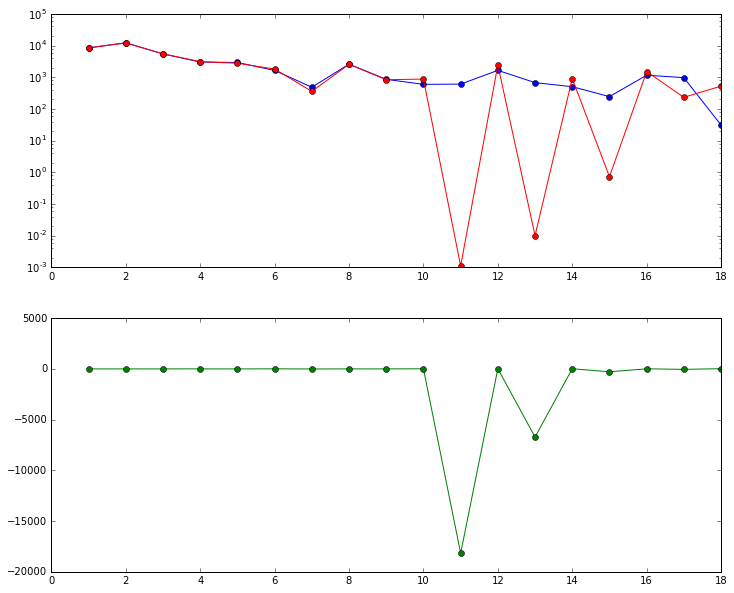

In [67]:
dadi.Plotting.plot_1d_comp_Poisson(fs_par_folded_by_Angsd[:19], fs_par_unfolded_by_Angsd_folded[:19], \
                                   residual='linear')

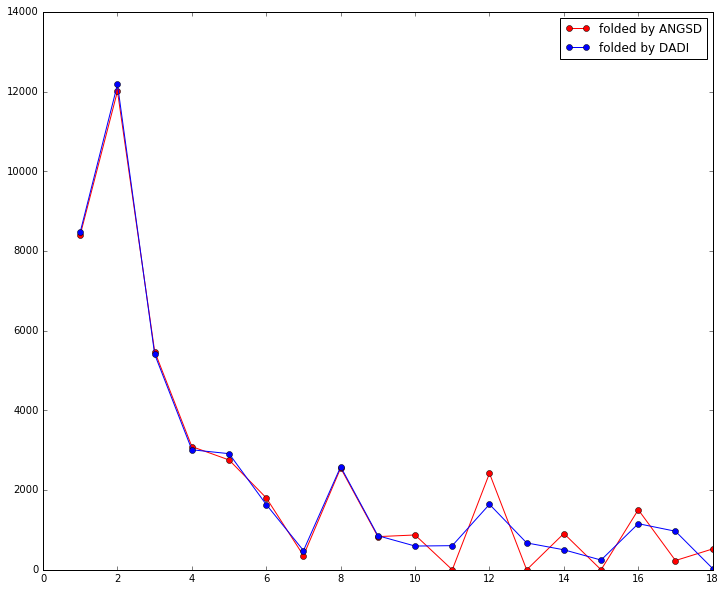

In [68]:
#pylab.subplot(2,1,1)
pylab.plot(fs_par_folded_by_Angsd[:19], 'ro-', label='folded by ANGSD')

#pylab.subplot(2,1,2)
pylab.plot(fs_par_unfolded_by_Angsd_folded, 'bo-', label='folded by DADI')
pylab.legend()
pylab.savefig('par_fold_comp.png')

The unfolded spectrum folded by dadi seems to be a bit better behaved than the one folded by ANGSD. I really wonder whether folding in ANGSD is needed.

The folded 2D spectrum from ANGSD is a 19 x 19 matrix. This is not a format that dadi can understand.

In [83]:
%psource dadi.Spectrum.from_data_dict

See this [thread on the dadi forum](https://groups.google.com/forum/#!searchin/dadi-user/fold/dadi-user/9EQTeZke0Bg/HTB8NzLGBQAJ).

---

## Exponential growth model

In [69]:
# show the source of the 'Demographics1D' method

%psource dadi.Demographics1D.growth

In [134]:
# create link to function that specifies a simple growth or decline model

func = dadi.Demographics1D.growth

In [135]:
# create extrapolating version of the function

func_ex = dadi.Numerics.make_extrap_log_func(func)

In [136]:
# set lower and upper bounds to nu and T

upper_bound = [100, 3]
lower_bound = [1e-2, 0]

In [137]:
# set starting value

p0 = [1, 1] # corresponds to constant population size

In [218]:
%pdoc dadi.Misc.perturb_params

In [138]:
# perturb starting values by up to a factor of 2

p0 = dadi.Misc.perturb_params(p0, fold=1, upper_bound=upper_bound, lower_bound=lower_bound)

In [141]:
p0

array([ 0.55710412,  0.77933981])

In [1]:
%psource dadi.Inference.optimize_log

Object `dadi.Inference.optimize_log` not found.


In [142]:
# run optimisation of paramters

popt = dadi.Inference.optimize_log(p0=p0, data=fs_ery, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)

In [143]:
popt

array([ 0.14288483,  0.00833611])

## Parallelised $\delta$a$\delta$i

I need to run the simulation with different starting values to check convergence.

I would like to do these runs in parallel. I have 12 cores available on huluvu.

In [144]:
from ipyparallel import Client

In [145]:
cl = Client()

In [146]:
cl.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

I now have connections to 11 engines. I started the engines with `ipcluster start -n 11 &` in the terminal.

In [147]:
# create load balanced view of the engines

lbview = cl.load_balanced_view()

In [148]:
lbview.block

False

In [149]:
# create direct view of all engines

dview = cl[:]

### import variables to namespace of engines

In [150]:
# set starting value for all engines

dview['p0'] = [1, 1]
dview['p0']

[[1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1]]

In [151]:
# set lower and upper bounds to nu and T for all engines

dview['upper_bound'] = [100, 3]
dview['lower_bound'] = [1e-2, 0]

In [152]:
dview['fs_ery'] = fs_ery
cl[0]['fs_ery']

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

In [153]:
dview['func_ex'] = func_ex
dview['pts_l'] = pts_l

### import dadi on all engines

In [155]:
with dview.sync_imports():
    import sys

importing sys on engine(s)


In [156]:
dview.execute('sys.path.insert(0, \'/home/claudius/Downloads/dadi\')')

<AsyncResult: execute>

In [157]:
cl[0]['sys.path']

['/home/claudius/Downloads/dadi',
 '/home/claudius/Downloads/dadi',
 '',
 '',
 '',
 '/usr/local/anaconda2/lib/python27.zip',
 '/usr/local/anaconda2/lib/python2.7',
 '/usr/local/anaconda2/lib/python2.7/plat-linux2',
 '/usr/local/anaconda2/lib/python2.7/lib-tk',
 '/usr/local/anaconda2/lib/python2.7/lib-old',
 '/usr/local/anaconda2/lib/python2.7/lib-dynload',
 '/usr/local/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages',
 '/usr/local/anaconda2/lib/python2.7/site-packages/IPython/extensions']

In [158]:
with dview.sync_imports():
    import dadi

importing dadi on engine(s)


### create parallel function to run dadi

In [163]:
@lbview.parallel(block=True)
def run_dadi(x): # for the function to be called with map, it needs to have one input variable
    # perturb starting values by up to a factor of 2
    p1 = dadi.Misc.perturb_params(p0, fold=1, upper_bound=upper_bound, lower_bound=lower_bound)
    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p1, data=fs_ery, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)
    return popt

In [164]:
run_dadi.map(range(20))

[array([ 0.13668736,  0.00752484]),
 array([ 0.13684148,  0.00752771]),
 array([ 0.13671433,  0.00752618]),
 array([ 0.14308558,  0.00834197]),
 array([ 0.14292083,  0.00833734]),
 array([ 0.14314298,  0.00835486]),
 array([ 0.13668235,  0.00752443]),
 array([ 0.1366822 ,  0.00752434]),
 array([ 0.14287361,  0.00833568]),
 array([ 0.13668195,  0.00752452]),
 array([ 0.62606677,  2.99324968]),
 array([ 0.13678064,  0.00752742]),
 array([ 0.13670026,  0.00752479]),
 array([ 0.13670157,  0.00752638]),
 array([ 0.27894601,  2.95644142]),
 array([ 0.13668552,  0.00752423]),
 array([ 0.14287362,  0.00833568]),
 array([ 0.14288403,  0.00833646]),
 array([ 0.1366844 ,  0.00752458]),
 array([ 0.13669382,  0.00752444])]

In [78]:
popt

array([ 0.14306651,  0.0083408 ])

In [60]:
# set starting value
p0 = [1, 1]

# perturb starting values by up to a factor of 2
p0 = dadi.Misc.perturb_params(p0, fold=1, upper_bound=upper_bound, lower_bound=lower_bound)

# run optimisation of paramters
popt = dadi.Inference.optimize_log(p0=p0, data=fs_ery_ext, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)
popt

array([ 0.14287362,  0.00833568])

---

In [85]:
def exp_growth(x):
    p0 = [1, 1]

    # perturb starting values by up to a factor of 2
    p0 = dadi.Misc.perturb_params(p0, fold=1, upper_bound=upper_bound, lower_bound=lower_bound)

    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p0, data=fs_ery_ext, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)
    return popt

In [86]:
popt = map(exp_growth, range(10))

In [87]:
# this will run a few minutes

# popt

[array([ 0.13671959,  0.00752554]),
 array([ 0.13684998,  0.00752938]),
 array([ 0.13668344,  0.00752429]),
 array([ 0.14287553,  0.00833577]),
 array([ 0.13680842,  0.00753195]),
 array([ 0.13668147,  0.00752434]),
 array([ 0.13668161,  0.00752433]),
 array([ 0.14294667,  0.00833834]),
 array([ 0.13668163,  0.00752433]),
 array([ 0.61500613,  2.99335042])]

In [89]:
import ipyparallel as ipp

In [90]:
c = ipp.Client()
c.ids

[0, 1, 2, 3]

In [94]:
%%time

dview = c[:]

popt = dview.map_sync(exp_growth, range(10))

CompositeError: one or more exceptions from call to method: exp_growth
[0:apply]: NameError: global name 'dadi' is not defined
[1:apply]: NameError: global name 'dadi' is not defined
[2:apply]: NameError: global name 'dadi' is not defined
[3:apply]: NameError: global name 'dadi' is not defined

Unfortunately, parallelisation is not as straightforward as it should be.

In [95]:
popt

[array([ 0.13671959,  0.00752554]),
 array([ 0.13684998,  0.00752938]),
 array([ 0.13668344,  0.00752429]),
 array([ 0.14287553,  0.00833577]),
 array([ 0.13680842,  0.00753195]),
 array([ 0.13668147,  0.00752434]),
 array([ 0.13668161,  0.00752433]),
 array([ 0.14294667,  0.00833834]),
 array([ 0.13668163,  0.00752433]),
 array([ 0.61500613,  2.99335042])]

Except for the last iteration, the two parameter estimates seem to have converged.

In [102]:
ns = fs_ery_ext.sample_sizes
ns

array([36])

In [105]:
print popt[0]
print popt[9]

[ 0.13671959  0.00752554]
[ 0.61500613  2.99335042]


What is the log likelihood of the model given these two different parameter sets?

In [109]:
model_one = func_ex(popt[0], ns, pts_l)
ll_model_one = dadi.Inference.ll_multinom(model_one, fs_ery_ext)
ll_model_one

-2078.9578383692165

In [110]:
model_two = func_ex(popt[9], ns, pts_l)
ll_model_two = dadi.Inference.ll_multinom(model_two, fs_ery_ext)
ll_model_two

-2442.1659496042312

The lower log-likelihood for the last set of parameters inferred indicates that the optimisation got trapped in a local minimum in the last run of the optimisation.

What the majority of the parameter sets seem to indicate is that at about time $0.007 \times 2 N_{ref}$ generations in the past the ancestral population started to shrink exponentially, reaching a population size of about $0.14 \times N_{ref}$ at present.

In [118]:
print 'The model suggests that exponential decline in population size started {0:.0f} generations ago.'.format(popt[0][1] * 2 * N_ref)

The model suggests that exponential decline in population size started 24241 generations ago.


### Two epoch model

In [119]:
dir(dadi.Demographics1D)

['Integration',
 'Numerics',
 'PhiManip',
 'Spectrum',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'bottlegrowth',
 'growth',
 'numpy',
 'snm',
 'three_epoch',
 'two_epoch']

In [122]:
%psource dadi.Demographics1D.two_epoch

This model specifies a stepwise change in population size some time ago. It assumes that the population size has stayed constant since the change.

In [124]:
func = dadi.Demographics1D.two_epoch
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [130]:
upper_bound = [10, 3]
lower_bound = [1e-3, 0]
pts_l = [40, 50, 60]

In [131]:
def stepwise_pop_change(x):
    # set initial values
    p0 = [1, 1]

    # perturb initial parameter values randomly by up to 2 * fold
    p0 = dadi.Misc.perturb_params(p0, fold=1.5, \
                                  upper_bound=upper_bound, lower_bound=lower_bound)
    
    # run optimisation
    popt = dadi.Inference.optimize_log(p0, fs_ery_ext, func_ex, pts_l, \
                                      upper_bound=upper_bound, lower_bound=lower_bound,
                                      verbose=0, maxiter=10)
    
    return popt

In [132]:
stepwise_pop_change(1)

array([ 0.71582479,  1.48177522])

In [133]:
stepwise_pop_change(1)

array([ 0.52313273,  0.02170397])

In [134]:
popt = map(stepwise_pop_change, range(10))

In [135]:
popt

[array([ 0.05346403,  0.00121263]),
 array([ 0.52820083,  1.52065476]),
 array([ 0.70098048,  1.49801054]),
 array([  1.23477031e-03,   2.65620732e-05]),
 array([ 0.93182588,  0.39965143]),
 array([  1.24562315e-03,   2.67845737e-05]),
 array([  2.60721008e-03,   5.69571832e-05]),
 array([  3.16956683e-03,   6.72777030e-05]),
 array([ 0.08273687,  0.00191126]),
 array([ 0.49179179,  1.48874641])]

This model does not converge on a set of parameter values. 

In [137]:
nu = [i[0] for i in popt]
nu

[0.053464033879808158,
 0.52820083105703042,
 0.70098048229605303,
 0.0012347703149881697,
 0.93182587694892949,
 0.0012456231458644071,
 0.002607210077695377,
 0.0031695668332491901,
 0.082736869674711166,
 0.4917917939974748]

In [138]:
T = [i[1] for i in popt]
T

[0.0012126341297049286,
 1.5206547612664572,
 1.4980105443841463,
 2.6562073197456022e-05,
 0.39965143435895278,
 2.6784573653534451e-05,
 5.6957183190580561e-05,
 6.7277702995326204e-05,
 0.0019112612533135542,
 1.4887464115585192]

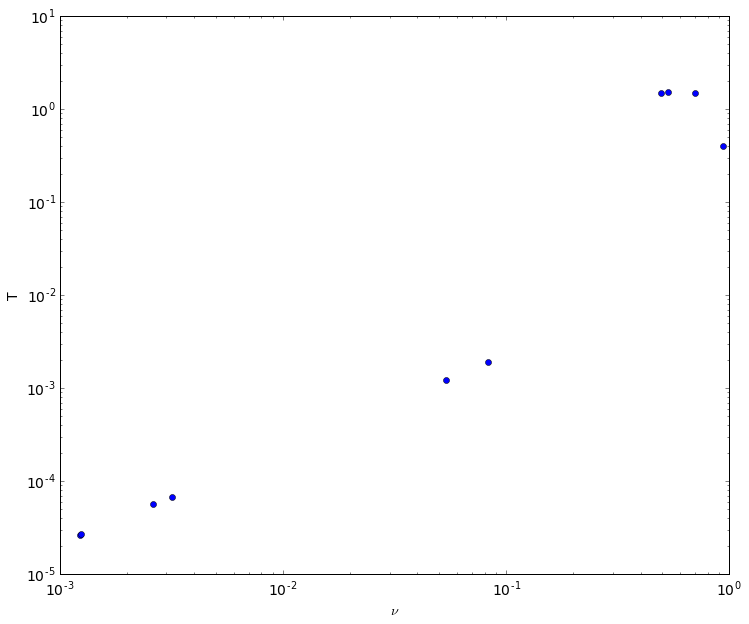

In [146]:
pylab.rcParams['font.size'] = 14.0

pylab.loglog(nu, T, 'bo')
pylab.xlabel(r'$\nu$')
pylab.ylabel('T')

Both parameters seem to be correlated. With the available data, it may not be possible to distinguish between a moderate reduction in population size a long time ago (topright in the above figure) and a drastic reduction in population size a short time ago (bottomleft in the above figure).

### Bottleneck then exponential growth

In [91]:
%psource dadi.Demographics1D

This model has three parameters. $\nu_B$ is the ratio of the population size (with respect to the ancestral population size $N_{ref}$) after the first stepwise change at time T in the past. The population is then asumed to undergo exponential growth/decline to a ratio of population size $\nu_F$ at present.

In [84]:
func = dadi.Demographics1D.bottlegrowth
func_ex = dadi.Numerics.make_extrap_log_func(func)

upper_bound = [100, 100, 3]
lower_bound = [1e-3, 1e-3, 0]
pts_l = [40, 50, 60]

In [79]:
def bottleneck_growth(x):
    p0 = [1, 1, 1] # corresponds to constant population size
    
        # perturb initial parameter values randomly by up to 2 * fold
    p0 = dadi.Misc.perturb_params(p0, fold=1.5, \
                                  upper_bound=upper_bound, lower_bound=lower_bound)
    
    # run optimisation
    popt = dadi.Inference.optimize_log(p0, fs_ery_ext, func_ex, pts_l, \
                                      upper_bound=upper_bound, lower_bound=lower_bound,
                                      verbose=0, maxiter=10)
    
    return popt

In [85]:
%%time

popt = map(bottleneck_growth, range(10))

In [90]:
popt

[array([ 3.32262806,  1.69146643,  2.56095916]),
 array([ 92.72772237,   0.61039715,   0.83221209]),
 array([ 40.09567759,   0.4476942 ,   0.36821649]),
 array([ 5.78225383,  1.74427897,  2.80682812]),
 array([ 36.39875643,   1.69763973,   2.89008727]),
 array([ 2.02417027,  1.27851264,  1.800669  ]),
 array([ 99.84634022,   1.22219195,   2.22506295]),
 array([ 37.78406406,   0.44611004,   0.36039046]),
 array([ 0.2564171 ,  0.23224403,  1.11415673]),
 array([ 82.35484216,   0.83001266,   1.2460676 ])]

There is no convergence of parameters estimates. The parameter combinations stand for vastly different demographic scenarios. Most seem to suggest a population increase (up to 100 times the ancestral population size), followed by exponential decrease to about the ancestral population size.

## Three epochs

In [92]:
func = dadi.Demographics1D.three_epoch
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [ ]:
%psource dadi.Demographics1D.three_epoch

This model tries to estimate three parameters. The populations is expected to undergo a stepwise population size change (bottleneck) at time TF + TB. At time TF it is expected to recover immediately to the current population size.

In [94]:
upper_bound = [100, 100, 3, 3]
lower_bound = [1e-3, 1e-3, 0, 0]
pts_l = [40, 50, 60]

In [95]:
def opt_three_epochs(x):
    p0 = [1, 1, 1, 1] # corresponds to constant population size
    
        # perturb initial parameter values randomly by up to 2 * fold
    p0 = dadi.Misc.perturb_params(p0, fold=1.5, \
                                  upper_bound=upper_bound, lower_bound=lower_bound)
    
    # run optimisation
    popt = dadi.Inference.optimize_log(p0, fs_ery_ext, func_ex, pts_l, \
                                      upper_bound=upper_bound, lower_bound=lower_bound,
                                      verbose=0, maxiter=10)
    
    return popt

In [96]:
%%time

popt = map(opt_three_epochs, range(10))

In [97]:
popt

[array([ 2.1322592 ,  1.80939584,  2.63255719,  1.19679208]),
 array([ 1.34425884,  1.16028262,  2.91869809,  0.88787625]),
 array([ 6.70550739,  0.40809191,  0.20894836,  0.04068077]),
 array([ 0.33077323,  0.28910967,  1.87311862,  0.30714645]),
 array([ 1.22342098,  1.97405895,  2.66260518,  2.59029637]),
 array([ 2.14133553,  0.29206373,  2.39829279,  2.63917117]),
 array([ 1.51260128,  0.60796628,  2.67526041,  0.01882071]),
 array([ 4.78149625,  0.20179516,  0.30563708,  0.02241828]),
 array([ 1.36953542,  1.07880153,  0.64664582,  0.69682647]),
 array([ 1.75466502,  1.40419974,  2.39931278,  1.26228929])]

Note, that only one of the optimisations inferred a bottleneck (4th). All others either inferred a constant population size or an increase in population size. Contemporary population sizes are mostly inferred to be similar to ancestral population sizes. The two time parameters vary wildly.